# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
One observation is that the Latitude vs. Temperature scatterplot is the only one that shows a trend compared to the other plots. The trend shows that Temp is higher near the equator (Latitude 0) compared to lower near the poles. This makes sense because the sun shines at a higher angle over the Equator than at the poles, resulting in the higher temps.

A second observation is that in the linear regression plots for lat vs temp in both hemispheres, they show a trend (as mentioned above) whereas the other plots do not really show any correlation. The lat vs temp for southern hemisphere shows a positive trend where temps get higher the further away from the south pole whereas the lat vs temp plot for northern hemisphere shows a neg trend.

A third observation is that latitude vs cloudiness, humidity, and wind speed have no correlations so those factors can probably be explained by other weather/natural events.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "citiesHW6.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


cities_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


city_number = 1
set_number = 1


print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    
    
    try:
        response = requests.get(query_url + city).json()
    
        
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_list.append(city)
        
        print(f'Processing Record {city_number} number of Set {set_number} | {city}')
        
        
        if city_number == 50:
            city_number = 1
            set_number += 1
        else:
            city_number += 1

    except:
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 number of Set 1 | santa isabel do rio negro
City not found. Skipping...
Processing Record 2 number of Set 1 | antofagasta
Processing Record 3 number of Set 1 | ushuaia
City not found. Skipping...
City not found. Skipping...
Processing Record 4 number of Set 1 | inongo
Processing Record 5 number of Set 1 | rikitea
Processing Record 6 number of Set 1 | hithadhoo
Processing Record 7 number of Set 1 | bonavista
Processing Record 8 number of Set 1 | bluff
Processing Record 9 number of Set 1 | talnakh
Processing Record 10 number of Set 1 | ribeira grande
Processing Record 11 number of Set 1 | saint-philippe
Processing Record 12 number of Set 1 | punta arenas
Processing Record 13 number of Set 1 | albany
Processing Record 14 number of Set 1 | port elizabeth
Processing Record 15 number of Set 1 | pevek
Processing Record 16 number of Set 1 | atuona
Processing Record 17 number of Set 1 | broken hill
Processing Record 18 n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create dataframe
weather_df = pd.DataFrame({'city': cities_list,
                           'lat': latitude,
                           'lng': longitude,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})


weather_df.to_csv(output_data_file)

weather_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa isabel do rio negro,-0.4139,-65.0192,72.37,91,59,2.19,BR,1659855233
1,antofagasta,-23.6500,-70.4000,54.68,59,0,8.41,CL,1659855233
2,ushuaia,-54.8000,-68.3000,29.86,86,0,2.30,AR,1659855125
3,inongo,-1.9500,18.2667,73.54,69,86,5.77,CD,1659855233
4,rikitea,-23.1203,-134.9692,70.20,67,100,27.18,PF,1659855234


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
if weather_df['Humidity'].max() > 100:
    
    humid_indices = weather_df.loc[weather_df['Humidity'] >= 100].index.to_list()

In [12]:
if weather_df['Humidity'].max() > 100:
    
    clean_data = weather_df.drop(humid_indices, inplace=False)
    
else:
    
    clean_data = weather_df.copy(deep=True)

clean_data.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa isabel do rio negro,-0.4139,-65.0192,72.37,91,59,2.19,BR,1659855233
1,antofagasta,-23.6500,-70.4000,54.68,59,0,8.41,CL,1659855233
2,ushuaia,-54.8000,-68.3000,29.86,86,0,2.30,AR,1659855125
3,inongo,-1.9500,18.2667,73.54,69,86,5.77,CD,1659855233
4,rikitea,-23.1203,-134.9692,70.20,67,100,27.18,PF,1659855234


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

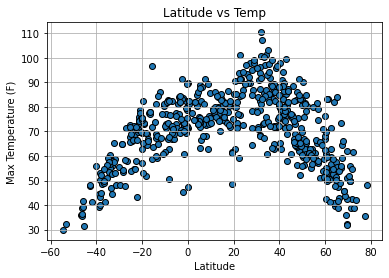

In [14]:

lat_values = clean_data['lat']
temp_values = clean_data['Max Temp']


plt.scatter(lat_values, temp_values, edgecolors='black')


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs Temp')
plt.grid()


plt.savefig('Lat_vs_Temp.png')

plt.show()

## Latitude vs. Humidity Plot

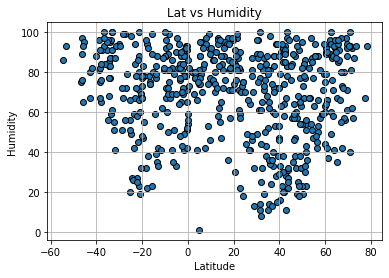

In [16]:
humidity_values = clean_data['Humidity']


plt.scatter(lat_values, humidity_values, edgecolors='black')


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Lat vs Humidity')
plt.grid()


plt.savefig('Lat_vs_Humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

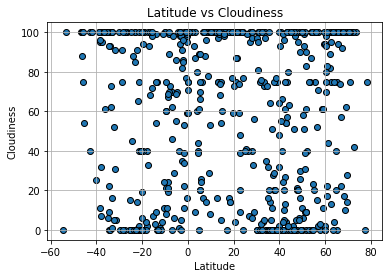

In [18]:
cloudy_values = clean_data['Cloudiness']


plt.scatter(lat_values, cloudy_values, edgecolors='black')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.grid()


plt.savefig('Lat_vs_Cloudiness.png')

plt.show()

## Latitude vs. Wind Speed Plot

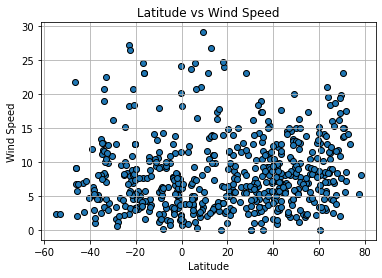

In [20]:
wind_values = clean_data['Wind Speed']


plt.scatter(lat_values, wind_values, edgecolors='black')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.grid()

plt.savefig('Lat_vs_WindSpeed.png')


plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3150878066194015


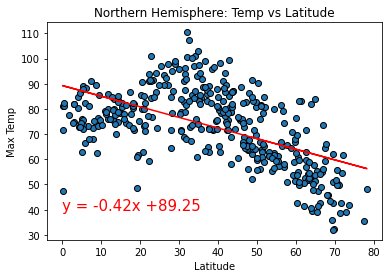

In [23]:



north_lat_values = clean_data.loc[clean_data['lat'] >= 0]['lat']
north_temp_values = clean_data.loc[clean_data['lat'] >= 0]['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_temp_values)
regress_values = north_lat_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat_values, north_temp_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Temp vs Latitude')
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig('NH_Temp_Lat.png')
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.625346795672392


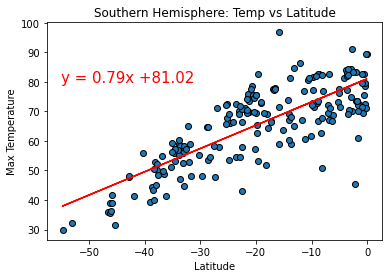

In [24]:

south_lat_values = clean_data.loc[clean_data['lat'] < 0]['lat']
south_temp_values = clean_data.loc[clean_data['lat'] < 0]['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_temp_values)
regress_values = south_lat_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat_values, south_temp_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere: Temp vs Latitude')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig('SH_Temp_Lat.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0022406111124367136


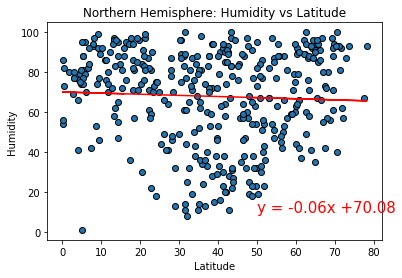

In [25]:



north_lat_values = clean_data.loc[clean_data['lat'] >= 0]['lat']
north_humid_values = clean_data.loc[clean_data['lat'] >= 0]['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_humid_values)
regress_values = north_lat_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(north_lat_values, north_humid_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs Latitude')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.savefig('NH_Humid_Lat.png')

plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.023465851730156886


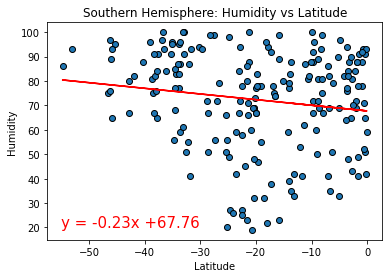

In [26]:

south_lat_values = clean_data.loc[clean_data['lat'] < 0]['lat']
south_humid_values = clean_data.loc[clean_data['lat'] < 0]['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_humid_values)
regress_values = south_lat_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(south_lat_values, south_humid_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs Latitude')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.savefig('SH_Humid_Lat.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0023563327741635545


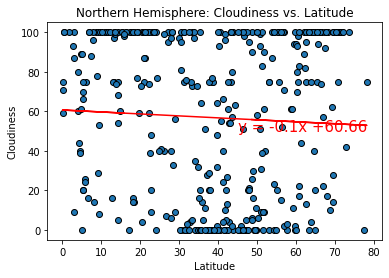

In [27]:



north_lat_values = clean_data.loc[clean_data['lat'] >= 0]['lat']
north_cloud_values = clean_data.loc[clean_data['lat'] >= 0]['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_cloud_values)
regress_values = north_lat_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(north_lat_values, north_cloud_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(line_eq,(45,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.savefig('NH_Cloud_Lat.png')

plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0010562560760063958


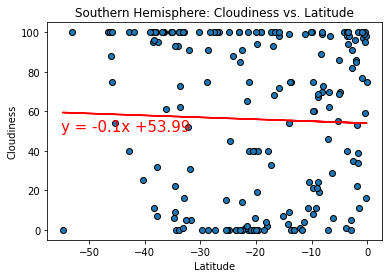

In [28]:



south_lat_values = clean_data.loc[clean_data['lat'] < 0]['lat']
south_cloud_values = clean_data.loc[clean_data['lat'] < 0]['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_cloud_values)
regress_values = south_lat_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(south_lat_values, south_cloud_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.savefig('SH_Cloud_Lat.png')

plt.show()



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009894206211468888


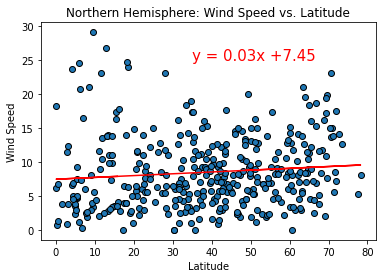

In [29]:



north_lat_values = clean_data.loc[clean_data['lat'] >= 0]['lat']
north_wind_values = clean_data.loc[clean_data['lat'] >= 0]['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat_values, north_wind_values)
regress_values = north_lat_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(north_lat_values, north_wind_values, edgecolors='black')
plt.plot(north_lat_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(line_eq,(35,25),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.savefig('NH_Wind_Lat.png')

plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.002826580785663774


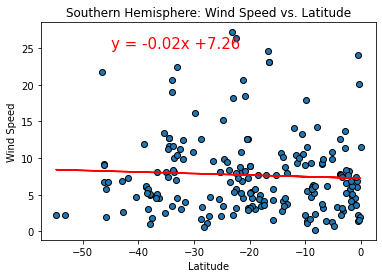

In [30]:



south_lat_values = clean_data.loc[clean_data['lat'] < 0]['lat']
south_wind_values = clean_data.loc[clean_data['lat'] < 0]['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat_values, south_wind_values)
regress_values = south_lat_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(south_lat_values, south_wind_values, edgecolors='black')
plt.plot(south_lat_values, regress_values, "r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")


plt.savefig('SH_Wind_Lat.png')

plt.show()

